In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import datasets, linear_model
from scipy import linalg

In [2]:
df = pd.read_csv('automobile.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         6019 non-null   float64
 1   Make          6019 non-null   object 
 2   Location      6019 non-null   object 
 3   Age           6019 non-null   int64  
 4   Odometer      6019 non-null   int64  
 5   FuelType      6019 non-null   object 
 6   Transmission  6019 non-null   object 
 7   OwnerType     6019 non-null   object 
 8   Mileage       6019 non-null   object 
 9   EngineCC      6019 non-null   object 
 10  PowerBhp      6019 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 517.4+ KB


# Machine Learning Model

In [4]:
df.head()

,Price,Make,Location,Age,Odometer,FuelType,Transmission,OwnerType,Mileage,EngineCC,PowerBhp
0,1.75,marutiwagonr,Mumbai,10,72000,CNG,Manual,First,26.6,998,58.16
1,12.50,hyundaicreta,Pune,5,41000,Diesel,Manual,First,19.67,1582,126.2
2,4.50,hondajazz,Chennai,9,46000,Petrol,Manual,First,18.2,1199,88.7
3,6.00,marutiertiga,Chennai,8,87000,Diesel,Manual,First,20.77,1248,88.76
4,17.74,audia4,Coimbatore,7,40670,Diesel,Automatic,Second,15.2,1968,140.8


In [5]:
import seaborn as sns

<AxesSubplot:xlabel='Price'>

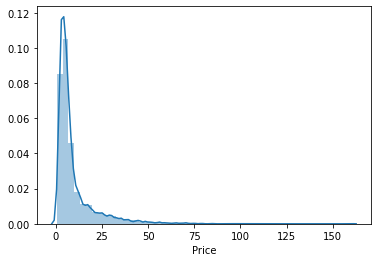

In [6]:
sns.distplot(df.Price)

<AxesSubplot:xlabel='Age'>

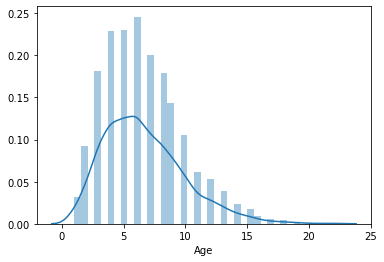

In [7]:
sns.distplot(df.Age)

<AxesSubplot:xlabel='Odometer'>

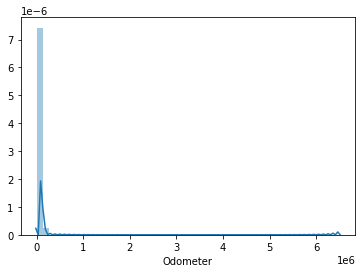

In [8]:
sns.distplot(df.Odometer)

<AxesSubplot:xlabel='Age', ylabel='Price'>

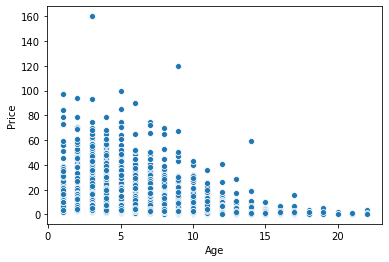

In [9]:
sns.scatterplot(x=df.Age,y=df.Price)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         6019 non-null   float64
 1   Make          6019 non-null   object 
 2   Location      6019 non-null   object 
 3   Age           6019 non-null   int64  
 4   Odometer      6019 non-null   int64  
 5   FuelType      6019 non-null   object 
 6   Transmission  6019 non-null   object 
 7   OwnerType     6019 non-null   object 
 8   Mileage       6019 non-null   object 
 9   EngineCC      6019 non-null   object 
 10  PowerBhp      6019 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 517.4+ KB


In [11]:
df.Make.value_counts()

marutiswift           353
hondacity             270
hyundaii20            247
hyundaiverna          170
hyundaii10            156
                     ... 
mahindraxuv300          1
bentleycontinental      1
ambassadorclassic       1
fordclassic             1
fiatgrandepuntoevo      1
Name: Make, Length: 217, dtype: int64

In [12]:
df.Make.value_counts()/df.shape[0]

marutiswift           0.058648
hondacity             0.044858
hyundaii20            0.041037
hyundaiverna          0.028244
hyundaii10            0.025918
                        ...   
mahindraxuv300        0.000166
bentleycontinental    0.000166
ambassadorclassic     0.000166
fordclassic           0.000166
fiatgrandepuntoevo    0.000166
Name: Make, Length: 217, dtype: float64

In [13]:
len(set(df.Make))

217

In [14]:
set(df.Make)

{'ambassadorclassic',
 'audia3',
 'audia4',
 'audia6',
 'audia7',
 'audia8',
 'audiq3',
 'audiq5',
 'audiq7',
 'audirs5',
 'auditt',
 'bentleycontinental',
 'bmw1',
 'bmw3',
 'bmw5',
 'bmw6',
 'bmw7',
 'bmwx1',
 'bmwx3',
 'bmwx5',
 'bmwx6',
 'bmwz4',
 'chevroletaveo',
 'chevroletbeat',
 'chevroletcaptiva',
 'chevroletcruze',
 'chevroletenjoy',
 'chevroletoptra',
 'chevroletsail',
 'chevroletspark',
 'chevrolettavera',
 'datsungo',
 'datsunredigo',
 'fiatavventura',
 'fiatgrandepunto',
 'fiatgrandepuntoevo',
 'fiatlinea',
 'fiatpetra',
 'fiatpunto',
 'fiatpuntoevo',
 'fiatsiena',
 'forceone',
 'fordaspire',
 'fordclassic',
 'fordecosport',
 'fordendeavour',
 'fordfiesta',
 'fordfigo',
 'fordfreestyle',
 'fordfusion',
 'fordikon',
 'fordmustang',
 'hondaaccord',
 'hondaamaze',
 'hondabrio',
 'hondabrv',
 'hondacity',
 'hondacivic',
 'hondacrv',
 'hondajazz',
 'hondamobilio',
 'hondawrv',
 'hyundaiaccent',
 'hyundaicreta',
 'hyundaielantra',
 'hyundaielite',
 'hyundaieon',
 'hyundaigetz',

In [15]:
df['make'] = df['Make'].str.replace('\d+', '')

In [16]:
len(set(df.make))

199

In [17]:
set(df.make)

{'ambassadorclassic',
 'audia',
 'audiq',
 'audirs',
 'auditt',
 'bentleycontinental',
 'bmw',
 'bmwx',
 'bmwz',
 'chevroletaveo',
 'chevroletbeat',
 'chevroletcaptiva',
 'chevroletcruze',
 'chevroletenjoy',
 'chevroletoptra',
 'chevroletsail',
 'chevroletspark',
 'chevrolettavera',
 'datsungo',
 'datsunredigo',
 'fiatavventura',
 'fiatgrandepunto',
 'fiatgrandepuntoevo',
 'fiatlinea',
 'fiatpetra',
 'fiatpunto',
 'fiatpuntoevo',
 'fiatsiena',
 'forceone',
 'fordaspire',
 'fordclassic',
 'fordecosport',
 'fordendeavour',
 'fordfiesta',
 'fordfigo',
 'fordfreestyle',
 'fordfusion',
 'fordikon',
 'fordmustang',
 'hondaaccord',
 'hondaamaze',
 'hondabrio',
 'hondabrv',
 'hondacity',
 'hondacivic',
 'hondacrv',
 'hondajazz',
 'hondamobilio',
 'hondawrv',
 'hyundaiaccent',
 'hyundaicreta',
 'hyundaielantra',
 'hyundaielite',
 'hyundaieon',
 'hyundaigetz',
 'hyundaigrand',
 'hyundaii',
 'hyundaisanta',
 'hyundaisantro',
 'hyundaisonata',
 'hyundaitucson',
 'hyundaiverna',
 'hyundaixcent',
 '

In [18]:
del df['make']

In [19]:
df.describe()

,Price,Age,Odometer
count,6019.000000,6019.000000,6.019000e+03
mean,9.479468,6.641801,5.873838e+04
std,11.187917,3.269742,9.126884e+04
min,0.440000,1.000000,1.710000e+02
25%,3.500000,4.000000,3.400000e+04
50%,5.640000,6.000000,5.300000e+04
75%,9.950000,9.000000,7.300000e+04
max,160.000000,22.000000,6.500000e+06


In [20]:
df.columns

Index(['Price', 'Make', 'Location', 'Age', 'Odometer', 'FuelType',
       'Transmission', 'OwnerType', 'Mileage', 'EngineCC', 'PowerBhp'],
      dtype='object')

In [21]:
set(df.Mileage)

{'+AC0-1',
 '10',
 '10.1',
 '10.13',
 '10.2',
 '10.37',
 '10.4',
 '10.5',
 '10.6',
 '10.8',
 '10.9',
 '10.91',
 '10.93',
 '10.98',
 '11',
 '11.05',
 '11.07',
 '11.1',
 '11.18',
 '11.2',
 '11.25',
 '11.3',
 '11.33',
 '11.36',
 '11.4',
 '11.49',
 '11.5',
 '11.56',
 '11.57',
 '11.62',
 '11.68',
 '11.7',
 '11.72',
 '11.74',
 '11.78',
 '11.79',
 '11.8',
 '11.9',
 '12',
 '12.05',
 '12.07',
 '12.1',
 '12.19',
 '12.3',
 '12.35',
 '12.37',
 '12.38',
 '12.39',
 '12.4',
 '12.5',
 '12.51',
 '12.55',
 '12.6',
 '12.62',
 '12.63',
 '12.65',
 '12.7',
 '12.8',
 '12.81',
 '12.83',
 '12.85',
 '12.86',
 '12.9',
 '12.95',
 '12.97',
 '12.98',
 '12.99',
 '13',
 '13.01',
 '13.06',
 '13.1',
 '13.14',
 '13.17',
 '13.2',
 '13.22',
 '13.24',
 '13.29',
 '13.33',
 '13.4',
 '13.44',
 '13.45',
 '13.49',
 '13.5',
 '13.53',
 '13.58',
 '13.6',
 '13.68',
 '13.7',
 '13.73',
 '13.8',
 '13.9',
 '13.93',
 '14',
 '14.02',
 '14.07',
 '14.1',
 '14.16',
 '14.2',
 '14.21',
 '14.24',
 '14.28',
 '14.3',
 '14.33',
 '14.36',
 '14.39'

In [22]:
df['mileage'] = pd.to_numeric(df.Mileage.replace('+AC0-1',None))

<AxesSubplot:xlabel='mileage', ylabel='Price'>

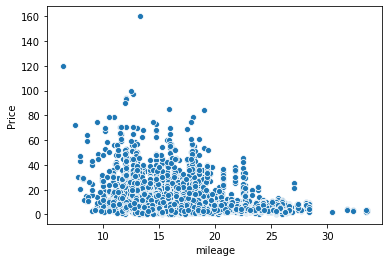

In [23]:
sns.scatterplot(x=df.mileage,y=df.Price)

In [24]:
set(df.EngineCC)

{'+AC0-1',
 '1014.45',
 '1047',
 '1061',
 '1077.42',
 '1086',
 '1120',
 '1150',
 '1172',
 '1186',
 '1193',
 '1194',
 '1196',
 '1197',
 '1198',
 '1199',
 '1240.47',
 '1242',
 '1248',
 '1272.33',
 '1298',
 '1299',
 '1341',
 '1343',
 '1364',
 '1368',
 '1373',
 '1374.44',
 '1388',
 '1390',
 '1395',
 '1396',
 '1399',
 '1405',
 '1422',
 '1461',
 '1462',
 '1468',
 '1489',
 '1493',
 '1494.72',
 '1495',
 '1496',
 '1497',
 '1498',
 '1499',
 '1582',
 '1586',
 '1590',
 '1591',
 '1595',
 '1596',
 '1597',
 '1598',
 '1599',
 '1781',
 '1794',
 '1796',
 '1797',
 '1798',
 '1799',
 '1896',
 '1948',
 '1950',
 '1956',
 '1968',
 '1969',
 '1978',
 '1984',
 '1985',
 '1991',
 '1995',
 '1997',
 '1998',
 '1999',
 '2092',
 '2112',
 '2143',
 '2147',
 '2148',
 '2149',
 '2179',
 '2198',
 '2199',
 '2200',
 '2216.69',
 '2349',
 '2354',
 '2359',
 '2359.43',
 '2360',
 '2362',
 '2393',
 '2400',
 '2446',
 '2477',
 '2487',
 '2489',
 '2494',
 '2495',
 '2496',
 '2497',
 '2498',
 '2499',
 '2523',
 '2609',
 '2689.36',
 '2694',

In [25]:
df['engineCC'] = pd.to_numeric(df.EngineCC.replace('+AC0-1',None))

In [26]:
set(df.PowerBhp)

{'+AC0-1',
 '100',
 '100.6',
 '101',
 '102',
 '102.5',
 '102.53',
 '102.57',
 '103',
 '103.2',
 '103.25',
 '103.3',
 '103.5',
 '103.52',
 '103.6',
 '104',
 '104.68',
 '105',
 '105.5',
 '106',
 '107.2',
 '107.3',
 '108.4',
 '108.45',
 '108.49',
 '108.495',
 '108.5',
 '108.62',
 '110',
 '110.4',
 '110.5',
 '110.78',
 '112',
 '112.2',
 '112.4',
 '112.41',
 '113.98',
 '114',
 '114.4',
 '115',
 '116.3',
 '116.4',
 '116.6',
 '116.9',
 '117.3',
 '118',
 '118.3',
 '118.6',
 '120',
 '120.33',
 '120.7',
 '121.3',
 '121.36',
 '121.4',
 '122',
 '122.62',
 '123.24',
 '123.37',
 '123.7',
 '125',
 '125.79',
 '126.2',
 '126.24',
 '126.3',
 '126.32',
 '127',
 '130',
 '130.2',
 '130.3',
 '132',
 '134',
 '135.1',
 '136',
 '138',
 '138.02',
 '138.03',
 '138.08',
 '138.1',
 '139.01',
 '139.07',
 '140',
 '140.8',
 '141',
 '141.1',
 '142',
 '143',
 '144',
 '147.5',
 '147.51',
 '147.6',
 '147.8',
 '147.9',
 '148',
 '148.31',
 '149.92',
 '150',
 '152',
 '152.88',
 '153.77',
 '153.86',
 '154',
 '155',
 '156',
 

In [27]:
df['powerBhp'] = pd.to_numeric(df.PowerBhp.replace('+AC0-1',None))

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         6019 non-null   float64
 1   Make          6019 non-null   object 
 2   Location      6019 non-null   object 
 3   Age           6019 non-null   int64  
 4   Odometer      6019 non-null   int64  
 5   FuelType      6019 non-null   object 
 6   Transmission  6019 non-null   object 
 7   OwnerType     6019 non-null   object 
 8   Mileage       6019 non-null   object 
 9   EngineCC      6019 non-null   object 
 10  PowerBhp      6019 non-null   object 
 11  mileage       6019 non-null   float64
 12  engineCC      6019 non-null   float64
 13  powerBhp      6019 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 658.5+ KB


In [29]:
df.head()

,Price,Make,Location,Age,Odometer,FuelType,Transmission,OwnerType,Mileage,EngineCC,PowerBhp,mileage,engineCC,powerBhp
0,1.75,marutiwagonr,Mumbai,10,72000,CNG,Manual,First,26.6,998,58.16,26.60,998.0,58.16
1,12.50,hyundaicreta,Pune,5,41000,Diesel,Manual,First,19.67,1582,126.2,19.67,1582.0,126.20
2,4.50,hondajazz,Chennai,9,46000,Petrol,Manual,First,18.2,1199,88.7,18.20,1199.0,88.70
3,6.00,marutiertiga,Chennai,8,87000,Diesel,Manual,First,20.77,1248,88.76,20.77,1248.0,88.76
4,17.74,audia4,Coimbatore,7,40670,Diesel,Automatic,Second,15.2,1968,140.8,15.20,1968.0,140.80


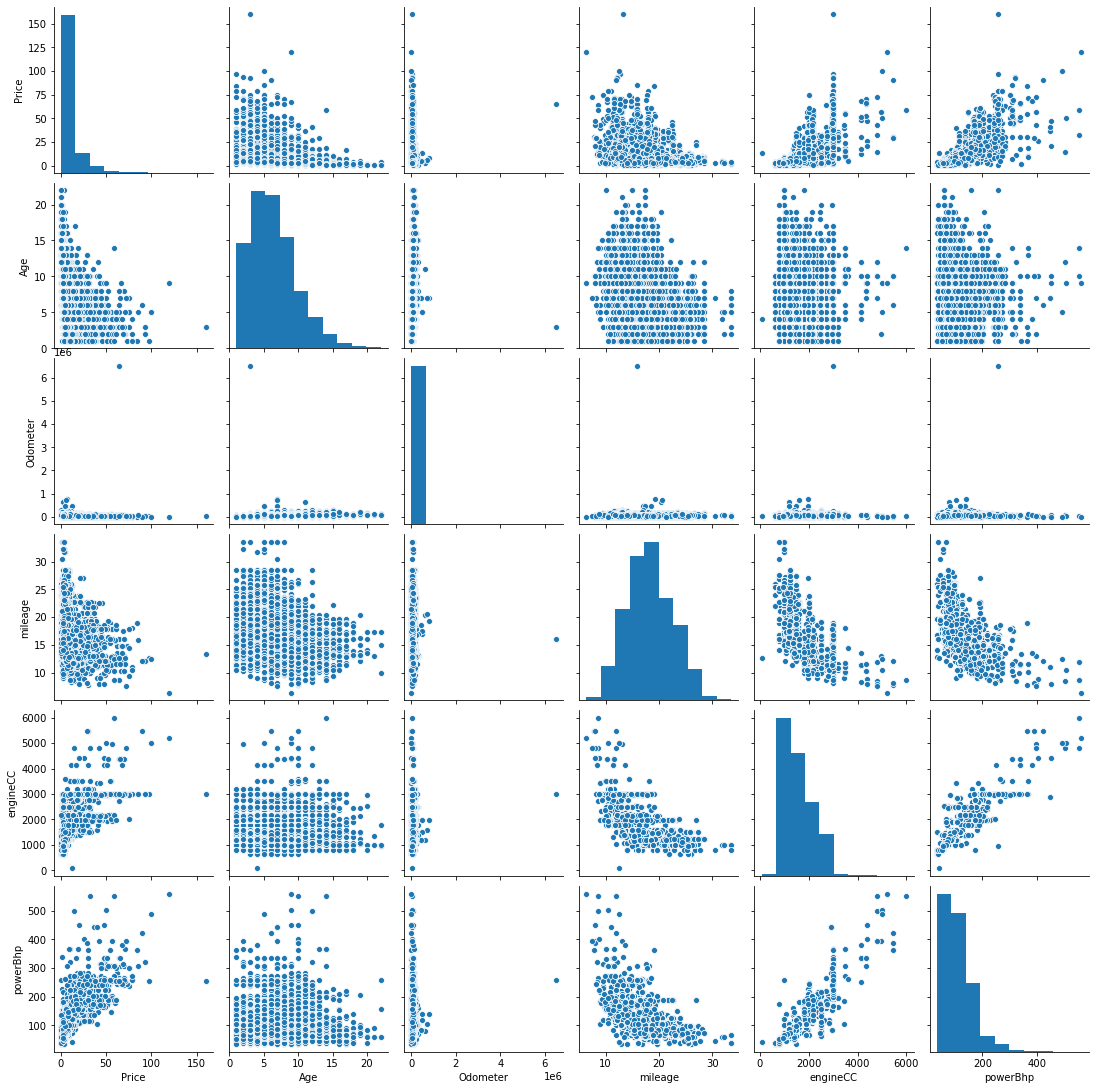

In [30]:
sns.pairplot(df[['Price','Age','Odometer','mileage','engineCC','powerBhp']])

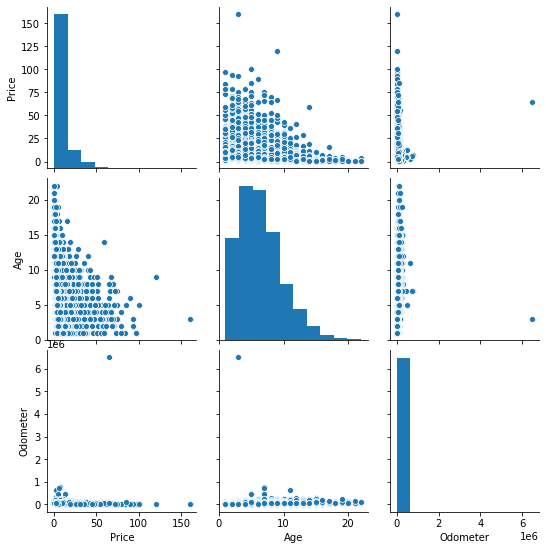

In [31]:
sns.pairplot(df[['Price','Age','Odometer']])

In [32]:
corrl = (df[['Price','Age','Odometer','mileage','engineCC','powerBhp']]).corr()
corrl

,Price,Age,Odometer,mileage,engineCC,powerBhp
Price,1.000000,-0.305327,-0.011493,-0.334989,0.659230,0.771140
Age,-0.305327,1.000000,0.173048,-0.295045,0.050181,-0.028722
Odometer,-0.011493,0.173048,1.000000,-0.065223,0.090721,0.031543
mileage,-0.334989,-0.295045,-0.065223,1.000000,-0.641136,-0.545009
engineCC,0.659230,0.050181,0.090721,-0.641136,1.000000,0.863728
powerBhp,0.771140,-0.028722,0.031543,-0.545009,0.863728,1.000000


In [33]:
corrl.style.background_gradient(cmap='coolwarm')

,Price,Age,Odometer,mileage,engineCC,powerBhp
Price,1.000000,-0.305327,-0.011493,-0.334989,0.659230,0.771140
Age,-0.305327,1.000000,0.173048,-0.295045,0.050181,-0.028722
Odometer,-0.011493,0.173048,1.000000,-0.065223,0.090721,0.031543
mileage,-0.334989,-0.295045,-0.065223,1.000000,-0.641136,-0.545009
engineCC,0.659230,0.050181,0.090721,-0.641136,1.000000,0.863728
powerBhp,0.771140,-0.028722,0.031543,-0.545009,0.863728,1.000000


In [34]:
np.where((df[['Price','Age','Odometer','mileage','engineCC','powerBhp']]).corr()>0.6,'Yes','No')

array([['Yes', 'No', 'No', 'No', 'Yes', 'Yes'],
       ['No', 'Yes', 'No', 'No', 'No', 'No'],
       ['No', 'No', 'Yes', 'No', 'No', 'No'],
       ['No', 'No', 'No', 'Yes', 'No', 'No'],
       ['Yes', 'No', 'No', 'No', 'Yes', 'Yes'],
       ['Yes', 'No', 'No', 'No', 'Yes', 'Yes']], dtype='<U3')

In [35]:
# Power BHP is highly positively correlated with the Price
# EngineCC is also highly correlated with the Price

In [36]:
# created dummy variables for those
# Location
# FuelType
# Transmission
# OwnerType

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         6019 non-null   float64
 1   Make          6019 non-null   object 
 2   Location      6019 non-null   object 
 3   Age           6019 non-null   int64  
 4   Odometer      6019 non-null   int64  
 5   FuelType      6019 non-null   object 
 6   Transmission  6019 non-null   object 
 7   OwnerType     6019 non-null   object 
 8   Mileage       6019 non-null   object 
 9   EngineCC      6019 non-null   object 
 10  PowerBhp      6019 non-null   object 
 11  mileage       6019 non-null   float64
 12  engineCC      6019 non-null   float64
 13  powerBhp      6019 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 658.5+ KB


In [38]:
Location_dummy = pd.get_dummies(df.Location,prefix='Location',drop_first=True)

In [39]:
FuelType_dummy = pd.get_dummies(df.FuelType,prefix='FuelType',drop_first=True)

In [40]:
Transmission_dummy = pd.get_dummies(df.Transmission,prefix='Transmission',drop_first=True)

In [41]:
OwnerType_dummy = pd.get_dummies(df.OwnerType,prefix='OwnerType',drop_first=True)

In [42]:
combine_all_dummy = pd.concat([df,Location_dummy,FuelType_dummy,Transmission_dummy,OwnerType_dummy],axis=1)

In [43]:
combine_all_dummy.head()

,Price,Make,Location,Age,Odometer,FuelType,Transmission,OwnerType,Mileage,EngineCC,...,Location_Mumbai,Location_Pune,FuelType_Diesel,FuelType_Electric,FuelType_LPG,FuelType_Petrol,Transmission_Manual,OwnerType_Fourth +ACY- Above,OwnerType_Second,OwnerType_Third
0,1.75,marutiwagonr,Mumbai,10,72000,CNG,Manual,First,26.6,998,...,1,0,0,0,0,0,1,0,0,0
1,12.50,hyundaicreta,Pune,5,41000,Diesel,Manual,First,19.67,1582,...,0,1,1,0,0,0,1,0,0,0
2,4.50,hondajazz,Chennai,9,46000,Petrol,Manual,First,18.2,1199,...,0,0,0,0,0,1,1,0,0,0
3,6.00,marutiertiga,Chennai,8,87000,Diesel,Manual,First,20.77,1248,...,0,0,1,0,0,0,1,0,0,0
4,17.74,audia4,Coimbatore,7,40670,Diesel,Automatic,Second,15.2,1968,...,0,0,1,0,0,0,0,0,1,0


In [44]:
combine_all_dummy.columns

Index(['Price', 'Make', 'Location', 'Age', 'Odometer', 'FuelType',
       'Transmission', 'OwnerType', 'Mileage', 'EngineCC', 'PowerBhp',
       'mileage', 'engineCC', 'powerBhp', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'FuelType_Diesel', 'FuelType_Electric', 'FuelType_LPG',
       'FuelType_Petrol', 'Transmission_Manual',
       'OwnerType_Fourth +ACY- Above', 'OwnerType_Second', 'OwnerType_Third'],
      dtype='object')

In [45]:
clean_df = combine_all_dummy.drop(columns=['Make','Location','FuelType','Transmission','OwnerType','Mileage', 'EngineCC', 'PowerBhp'])

In [46]:
clean_df.columns

Index(['Price', 'Age', 'Odometer', 'mileage', 'engineCC', 'powerBhp',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'FuelType_Diesel', 'FuelType_Electric', 'FuelType_LPG',
       'FuelType_Petrol', 'Transmission_Manual',
       'OwnerType_Fourth +ACY- Above', 'OwnerType_Second', 'OwnerType_Third'],
      dtype='object')

In [47]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Price                         6019 non-null   float64
 1   Age                           6019 non-null   int64  
 2   Odometer                      6019 non-null   int64  
 3   mileage                       6019 non-null   float64
 4   engineCC                      6019 non-null   float64
 5   powerBhp                      6019 non-null   float64
 6   Location_Bangalore            6019 non-null   uint8  
 7   Location_Chennai              6019 non-null   uint8  
 8   Location_Coimbatore           6019 non-null   uint8  
 9   Location_Delhi                6019 non-null   uint8  
 10  Location_Hyderabad            6019 non-null   uint8  
 11  Location_Jaipur               6019 non-null   uint8  
 12  Location_Kochi                6019 non-null   uint8  
 13  Loc

clean_df[['Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'FuelType_Diesel', 'FuelType_Electric', 'FuelType_LPG',
       'FuelType_Petrol', 'Transmission_Manual',
       'OwnerType_Fourth +ACY- Above', 'OwnerType_Second', 'OwnerType_Third']] = clean_df[['Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'FuelType_Diesel', 'FuelType_Electric', 'FuelType_LPG',
       'FuelType_Petrol', 'Transmission_Manual',
       'OwnerType_Fourth +ACY- Above', 'OwnerType_Second', 'OwnerType_Third']].apply(pd.Categorical) 
print(clean_df.dtypes) 

In [48]:
clean_df.columns

Index(['Price', 'Age', 'Odometer', 'mileage', 'engineCC', 'powerBhp',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'FuelType_Diesel', 'FuelType_Electric', 'FuelType_LPG',
       'FuelType_Petrol', 'Transmission_Manual',
       'OwnerType_Fourth +ACY- Above', 'OwnerType_Second', 'OwnerType_Third'],
      dtype='object')

In [49]:
# Before proceeding to creating a Linear Regression Model, we need to verify the assumptions of LR
# investigating a linear relationship
# All variables follow a normal distribution
# There is very little or no multicollinearity
# There is little or no autocorrelation
# Data is homoscedastic

In [50]:
# Assumptions

Text(0.5, 1.0, 'Verify Linear Relationship')

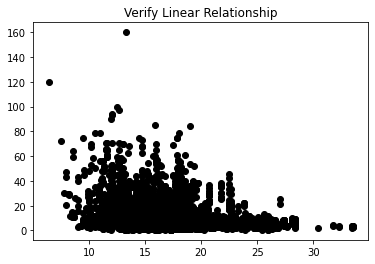

In [51]:
#investigating the linear relationship
plt.plot(clean_df.mileage, clean_df.Price, 'o', color='black');
plt.title("Verify Linear Relationship")

Text(0.5, 1.0, 'Verify Linear Relationship')

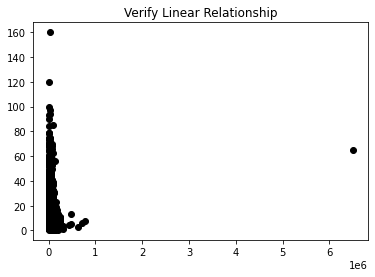

In [52]:
#understanding the linear relationship
plt.plot(clean_df.Odometer, clean_df.Price, 'o', color='black');
plt.title("Verify Linear Relationship")

Text(0.5, 1.0, 'Verify Linear Relationship')

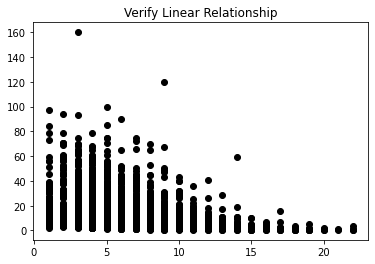

In [53]:
#understanding the linear relationship
plt.plot(clean_df.Age, clean_df.Price, 'o', color='black');
plt.title("Verify Linear Relationship")

Text(0.5, 1.0, 'Verify Linear Relationship')

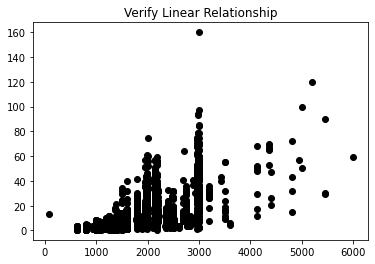

In [54]:
#understanding the linear relationship
plt.plot(clean_df.engineCC, clean_df.Price, 'o', color='black');
plt.title("Verify Linear Relationship")

Text(0.5, 1.0, 'Verify Linear Relationship')

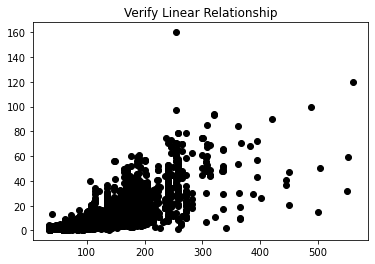

In [55]:
#understanding the linear relationship
plt.plot(clean_df.powerBhp, clean_df.Price, 'o', color='black');
plt.title("Verify Linear Relationship")

In [56]:
# there is no evident of strong linear relatiosnhip among the dependent variable and other numeric independent variables
# hence making a linear regression won't help the purpose
# If Business wants a solution yes, we can proceed with caution

<AxesSubplot:>

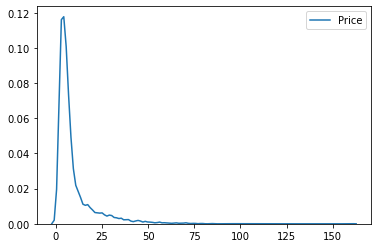

In [57]:
# All variables follow a normal distribution
sns.kdeplot(clean_df.Price)

<AxesSubplot:xlabel='Price'>

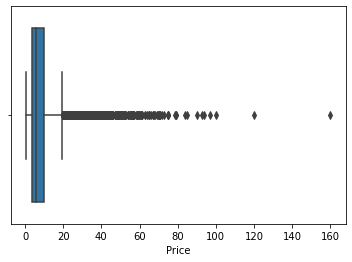

In [58]:
sns.boxplot(clean_df.Price)

In [59]:
# Q3 + 1.5*IQR
def find_outliers(x):
    IQR = x.describe()[6]-x.describe()[4] #Q3-Q1
    UCL = x.describe()[6] + 1.5*IQR # Q3+1.5*IQR
    LCL = x.describe()[4] - 1.5*IQR #Q1-1.5*IQR
    H_values = x[x > UCL] # outliers on the higher side
    L_values = x[x < LCL] #outliers on the lower side
    return(len(H_values),len(L_values)) #number of outliers

In [60]:
find_outliers(clean_df.Price)

(718, 0)

In [61]:
# there are many outliers in the dependent variable, we need to treat the outliers

<AxesSubplot:>

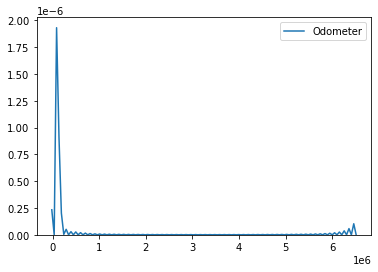

In [62]:
sns.kdeplot(clean_df.Odometer)

<AxesSubplot:xlabel='Odometer'>

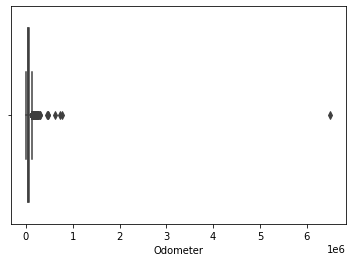

In [63]:
sns.boxplot(clean_df.Odometer)

In [64]:
find_outliers(clean_df.Odometer)

(202, 0)

<AxesSubplot:>

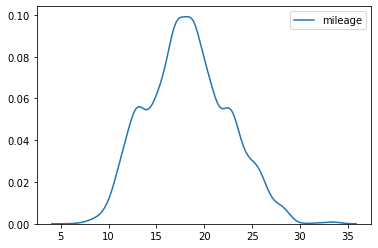

In [65]:
sns.kdeplot(clean_df.mileage)

In [66]:
# mileage seems to be approximately normal 

<AxesSubplot:xlabel='mileage'>

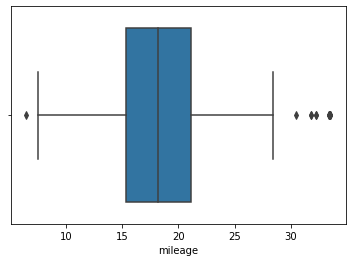

In [67]:
sns.boxplot(clean_df.mileage)

In [68]:
find_outliers(clean_df.mileage)

(14, 1)

In [69]:
# few outliers

<AxesSubplot:>

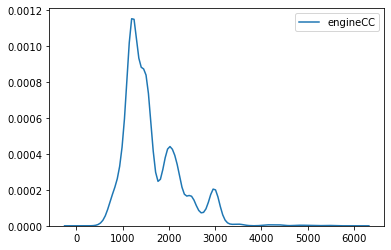

In [70]:
sns.kdeplot(clean_df.engineCC)

<AxesSubplot:xlabel='engineCC'>

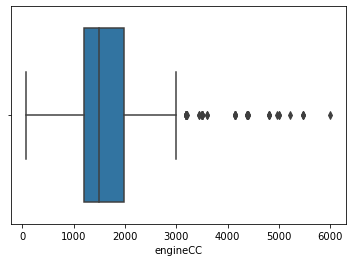

In [71]:
sns.boxplot(clean_df.engineCC)

In [72]:
find_outliers(clean_df.engineCC)

(61, 0)

In [73]:
# less outliers

<AxesSubplot:>

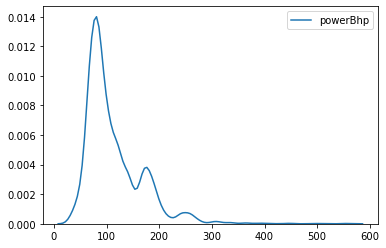

In [74]:
sns.kdeplot(clean_df.powerBhp)

<AxesSubplot:xlabel='powerBhp'>

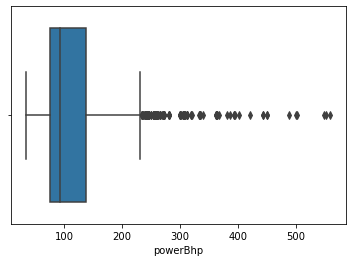

In [75]:
sns.boxplot(clean_df.powerBhp)

In [76]:
find_outliers(clean_df.powerBhp)

(239, 0)

In [77]:
# we have three options:
# 1. Be cognizant about outliers, considering them as reality, go ahead with modeling
# 2. Delete the outliers from the dataset, this will lead to significant data loss, information loss
# 3. Cap the Outliers to their threshold value, anything greater than UCL = Q3, and less than LCL = Q1, 
# we can build a good model, but it will lack reality

In [78]:
# cognizant about the all the three options i have decided to go with option 1

In [79]:
clean_df.dtypes

Price                           float64
Age                               int64
Odometer                          int64
mileage                         float64
engineCC                        float64
powerBhp                        float64
Location_Bangalore                uint8
Location_Chennai                  uint8
Location_Coimbatore               uint8
Location_Delhi                    uint8
Location_Hyderabad                uint8
Location_Jaipur                   uint8
Location_Kochi                    uint8
Location_Kolkata                  uint8
Location_Mumbai                   uint8
Location_Pune                     uint8
FuelType_Diesel                   uint8
FuelType_Electric                 uint8
FuelType_LPG                      uint8
FuelType_Petrol                   uint8
Transmission_Manual               uint8
OwnerType_Fourth +ACY- Above      uint8
OwnerType_Second                  uint8
OwnerType_Third                   uint8
dtype: object

In [80]:
# There is very little or no multicollinearity
# multicollinearity is handled later after creation of the model

In [81]:
# Data is homoscedastic
# this is a post modeling exercise, done later in this script

In [82]:
#split the dataset into training and testig 
data_train, data_test = train_test_split(clean_df,test_size=0.25,random_state=1234)

In [83]:
data_train.shape,data_test.shape

((4514, 24), (1505, 24))

In [84]:
XTrain = np.array(data_train.iloc[:,0:(clean_df.shape[1]-1)])
YTrain = np.array(data_train['Price'])

In [85]:
XTest = np.array(data_test.iloc[:,0:(clean_df.shape[1]-1)])
YTest = np.array(data_test['Price'])

In [86]:
XTrain.shape, XTest.shape

((4514, 23), (1505, 23))

In [87]:
#multiple linear regression model
reg = linear_model.LinearRegression()
reg

LinearRegression()

In [88]:
reg.fit(XTrain,YTrain) #training the model

LinearRegression()

In [89]:
print('Coefficients: \n', np.round(reg.coef_,4))

Coefficients: 
 [ 1.  0. -0. -0. -0.  0.  0.  0.  0.  0. -0. -0.  0.  0. -0. -0. -0.  0.
 -0.  0.  0. -0.  0.]


In [90]:
print('Intercept: \n', np.round(reg.intercept_,0))

Intercept: 
 0.0


In [91]:
reg.score(XTrain,YTrain) # R-square value from the trained model

1.0

In [92]:
reg.score(XTest,YTest) # R-square value from the test set

1.0

In [93]:
from scipy import stats

In [94]:
# Using Statistical API

In [95]:
import statsmodels.api as sm

In [96]:
y = np.array(clean_df['Price'])
xx = np.array(clean_df[['Price', 'Age', 'Odometer', 'mileage', 'engineCC', 'powerBhp',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'FuelType_Diesel', 'FuelType_Electric', 'FuelType_LPG',
       'FuelType_Petrol', 'Transmission_Manual',
       'OwnerType_Fourth +ACY- Above', 'OwnerType_Second', 'OwnerType_Third']])

In [97]:
y

array([ 1.75, 12.5 ,  4.5 , ...,  2.9 ,  2.65,  2.5 ])

In [98]:
mod = sm.OLS(y, xx)

results = mod.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.310e+28
Date:                Thu, 07 Jan 2021   Prob (F-statistic):                        0.00
Time:                        21:06:01   Log-Likelihood:                      1.5711e+05
No. Observations:                6019   AIC:                                 -3.142e+05
Df Residuals:                    5995   BIC:                                 -3.140e+05
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [99]:
# This might indicate that there are strong multicollinearity

In [100]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 1.00000000e+00 -1.37558151e-16  1.03864475e-17  7.03986023e-16
  8.49108178e-18 -4.35957694e-16  1.33514077e-15 -2.70508442e-17
  3.28838519e-16 -1.76752059e-16  7.51135265e-16  1.38344197e-15
  1.67270711e-15  5.11743425e-16  1.39428399e-16  2.18141477e-16
 -5.12892680e-15 -5.79397641e-15 -2.19442520e-16 -3.55921889e-15
 -8.85684755e-16 -5.02202446e-16 -3.40873163e-16 -1.62348433e-15]
R2:  1.0


In [101]:
print('Parameters: ', results.params)
print('Standard errors: ', results.bse)
print('Predicted values: ', results.predict())

Parameters:  [ 1.00000000e+00 -1.37558151e-16  1.03864475e-17  7.03986023e-16
  8.49108178e-18 -4.35957694e-16  1.33514077e-15 -2.70508442e-17
  3.28838519e-16 -1.76752059e-16  7.51135265e-16  1.38344197e-15
  1.67270711e-15  5.11743425e-16  1.39428399e-16  2.18141477e-16
 -5.12892680e-15 -5.79397641e-15 -2.19442520e-16 -3.55921889e-15
 -8.85684755e-16 -5.02202446e-16 -3.40873163e-16 -1.62348433e-15]
Standard errors:  [2.34509635e-15 5.69350797e-15 1.63148501e-19 4.04152348e-15
 5.76471760e-17 7.02891824e-16 9.34709592e-14 8.86316495e-14
 8.48716143e-14 8.58573933e-14 8.32022055e-14 9.10459447e-14
 8.43089431e-14 8.73171557e-14 8.18409968e-14 8.46587046e-14
 1.21698314e-13 7.98019501e-13 3.71341015e-13 1.09800792e-13
 4.31152096e-14 3.75616207e-13 4.24457220e-14 1.11753313e-13]
Predicted values:  [ 1.75 12.5   4.5  ...  2.9   2.65  2.5 ]


In [102]:
infl = results.get_influence()

In [103]:
print(infl.summary_frame().filter(regex="dfb"))

        dfb_x1    dfb_x2      dfb_x3    dfb_x4    dfb_x5    dfb_x6    dfb_x7  \
0     0.151695 -0.017794  -13.810035  0.181078  0.633106 -0.377082 -0.000112   
1     0.121790  0.000941   79.197995  0.033253  0.088498 -0.125366  0.010155   
2     0.254088 -0.013534  -43.050008  0.042685  0.070246 -0.216151  0.010261   
3     0.602685 -0.070600    8.509360  0.443401  0.753396 -0.821829  0.027867   
4     0.134413 -0.027763  -33.335333  0.054800  0.150178 -0.173144 -0.004729   
...        ...       ...         ...       ...       ...       ...       ...   
6014  0.050787 -0.044406  -29.468499 -0.012233  0.402592 -0.389577 -0.008852   
6015  0.110266  0.014468  -47.662511  0.054265  0.438912 -0.210908  0.001297   
6016  0.291430 -0.093376  160.927292  0.183029  0.520267 -1.051591  0.072698   
6017  0.628444 -0.060210  166.062286  0.114033  0.828792 -0.673667  0.012664   
6018  0.040520  0.000407   76.746030  0.011672  0.063727 -0.181062  0.004551   

        dfb_x8    dfb_x9   dfb_x10  ...

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [106]:
X = clean_df.drop('Price',axis=1)

vif_df = calc_vif(X)

vif_df.sort_values(by='VIF', ascending=False).head()

,variables,VIF
3,engineCC,47.739114
15,FuelType_Diesel,37.931247
4,powerBhp,29.552494
2,mileage,27.715907
18,FuelType_Petrol,26.455456


In [107]:
X = clean_df.drop(['Price','engineCC'],axis=1)

vif_df = calc_vif(X)

vif_df.sort_values(by='VIF', ascending=False).head()

,variables,VIF
14,FuelType_Diesel,31.231801
17,FuelType_Petrol,23.955044
2,mileage,23.103542
3,powerBhp,10.462183
0,Age,7.297420


In [108]:
X = clean_df.drop(['Price','engineCC','FuelType_Diesel'],axis=1)

vif_df = calc_vif(X)

vif_df.sort_values(by='VIF', ascending=False).head()

,variables,VIF
2,mileage,14.916291
3,powerBhp,6.843925
0,Age,6.840977
17,Transmission_Manual,5.612177
12,Location_Mumbai,3.797697


In [109]:
X = clean_df.drop(['Price','engineCC','FuelType_Diesel','mileage'],axis=1)

vif_df = calc_vif(X)

vif_df.sort_values(by='VIF', ascending=False).head()

,variables,VIF
0,Age,6.834173
2,powerBhp,6.782311
16,Transmission_Manual,4.479880
11,Location_Mumbai,2.797853
7,Location_Hyderabad,2.619884


In [110]:
# VIF less than 10 is acceptable
# the more your VIF increases, the less reliable your regression results are going to be. 
# In general, a VIF above 10 indicates high correlation and is cause for concern.

In [111]:
# we are losing two important variables enigneCC and mileage, we can consider verifying them by converting them
# into buckets

In [112]:
clean_df.head()

,Price,Age,Odometer,mileage,engineCC,powerBhp,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Mumbai,Location_Pune,FuelType_Diesel,FuelType_Electric,FuelType_LPG,FuelType_Petrol,Transmission_Manual,OwnerType_Fourth +ACY- Above,OwnerType_Second,OwnerType_Third
0,1.75,10,72000,26.60,998.0,58.16,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,12.50,5,41000,19.67,1582.0,126.20,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,4.50,9,46000,18.20,1199.0,88.70,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,6.00,8,87000,20.77,1248.0,88.76,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,17.74,7,40670,15.20,1968.0,140.80,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [113]:
#pd.qcut(clean_df.mileage,q=[0.,0.25,0.50,0.75,1.]).value_counts()

In [114]:
#hml_mileage = pd.get_dummies(pd.qcut(clean_df.mileage,q=[0.,0.25,0.50,0.75,1.]),prefix='mileage',drop_first=True)
# high, medium and low

In [115]:
#pd.qcut(clean_df.mileage,q=[0.,0.25,0.50,0.75,1.]).value_counts()

In [116]:
#pd.qcut(clean_df.engineCC,q=[0.,0.25,0.50,0.75,1.]).value_counts()

In [117]:
#hml_engineCC = pd.get_dummies(pd.qcut(clean_df.engineCC,q=[0.,0.25,0.50,0.75,1.]),prefix='engineCC',drop_first=True)
# high, medium and low

In [118]:
#clean_df = pd.concat([clean_df,hml_mileage,hml_engineCC],axis=1)

In [119]:
clean_df.head()

,Price,Age,Odometer,mileage,engineCC,powerBhp,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Mumbai,Location_Pune,FuelType_Diesel,FuelType_Electric,FuelType_LPG,FuelType_Petrol,Transmission_Manual,OwnerType_Fourth +ACY- Above,OwnerType_Second,OwnerType_Third
0,1.75,10,72000,26.60,998.0,58.16,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,12.50,5,41000,19.67,1582.0,126.20,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,4.50,9,46000,18.20,1199.0,88.70,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,6.00,8,87000,20.77,1248.0,88.76,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,17.74,7,40670,15.20,1968.0,140.80,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [120]:
X = clean_df.drop(['Price','engineCC','mileage'],axis=1)

vif_df = calc_vif(X)

vif_df.sort_values(by='VIF', ascending=False).head()

,variables,VIF
13,FuelType_Diesel,20.164122
16,FuelType_Petrol,16.654208
2,powerBhp,9.591883
0,Age,7.077965
17,Transmission_Manual,5.582305


In [121]:
X = clean_df.drop(['Price','engineCC','FuelType_Diesel','mileage'],axis=1)

vif_df = calc_vif(X)

vif_df.sort_values(by='VIF', ascending=False).head()

,variables,VIF
0,Age,6.834173
2,powerBhp,6.782311
16,Transmission_Manual,4.479880
11,Location_Mumbai,2.797853
7,Location_Hyderabad,2.619884


In [122]:
#pd.qcut(clean_df.powerBhp,q=[0.,0.25,0.50,0.75,1.]).value_counts()

In [123]:
#hml_powerBhp = pd.get_dummies(pd.qcut(clean_df.powerBhp,q=[0.,0.25,0.50,0.75,1.]),prefix='powerBhp',drop_first=True)
# high, medium and low

In [124]:
#clean_df = pd.concat([clean_df,hml_powerBhp],axis=1)

In [125]:
X = clean_df.drop(['Price','engineCC','FuelType_Diesel','mileage','powerBhp'],axis=1)

vif_df = calc_vif(X)

vif_df.sort_values(by='VIF', ascending=False).head()

,variables,VIF
0,Age,6.322638
15,Transmission_Manual,3.482934
14,FuelType_Petrol,1.997771
6,Location_Hyderabad,1.838072
11,Location_Pune,1.760061


In [126]:
# numeric values of engineCC, mileage and powerBhp lead to high multicollinearity, hence quantile based
# buckets created and then dummy variables introduced, which reduced the multicollinearity

# diesel fuel type also contributed to high multicollinearity, hence dropped from the model

In [127]:
y = clean_df['Price']
x = clean_df.drop(['Price','engineCC','FuelType_Diesel','mileage'],axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1234)

xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

new_model = LinearRegression()

new_model.fit(xtrain,ytrain)

print(new_model.score(xtrain,ytrain))

print(new_model.score(xtest,ytest))

0.7000714797069869
0.6902967954209108


In [128]:
resultsDF = pd.DataFrame()
resultsDF['Variables'] = pd.Series(xtrain.columns)
resultsDF['coefficients'] = pd.Series(np.round(new_model.coef_,2))
resultsDF.sort_values(by='coefficients',ascending=False)

,Variables,coefficients
13,FuelType_Electric,9.02
17,OwnerType_Fourth +ACY- Above,4.70
5,Location_Coimbatore,2.35
3,Location_Bangalore,1.96
7,Location_Hyderabad,1.92
19,OwnerType_Third,1.66
14,FuelType_LPG,1.50
4,Location_Chennai,1.05
8,Location_Jaipur,0.65
12,Location_Pune,0.21


In [129]:
np.round(new_model.intercept_,2)

1.53

In [130]:
#mod = sm.OLS(np.array(ytrain), np.array(xtrain))

#results = mod.fit()
#print(results.summary())

In [131]:
# how good the model is?

# R-square, coefficient of determination, 
# the value ranges from 0-1, 
# 0- there is no predictive power in the model
# 1- abosulte predictive power
# 0.8- a good model

In [132]:
#adjusted R square
def AdjustedRSquare(model,X,Y):
    YHat = model.predict(X)
    n,k = X.shape
    sse = np.sum(np.square(YHat-Y),axis=0) #sum of suare error
    sst = np.sum(np.square(Y-np.mean(Y)),axis=0) # sum of square total
    R2 = 1- sse/sst #explained sum of squares
    adjR2 = R2-(1-R2)*(float(k)/(n-k-1))
    return adjR2, R2

In [133]:
from scipy import stats

In [134]:
def ReturnPValue(model,X,Y):
    YHat = model.predict(X)
    n,k = X.shape
    sse = np.sum(np.square(YHat-Y),axis=0)
    x = np.hstack((np.ones((n,1)),np.matrix(X)))
    df = float(n-k-1)
    sampleVar = sse/df
    sampleVarianceX = x.T*x
    covarianceMatrix = linalg.sqrtm(sampleVar*sampleVarianceX.I)
    se = covarianceMatrix.diagonal()[1:]
    betasTstat = np.zeros(len(se))
    for i in range(len(se)):
        betasTstat[i] = model.coef_[i]/se[i]
    betasPvalue = 1- stats.t.cdf(abs(betasTstat),df)
    return betasPvalue

In [135]:
resultsDF['p_value'] = pd.Series(np.round(ReturnPValue(new_model,xtrain,ytrain),2))
resultsDF.sort_values(by='coefficients',ascending=False)

,Variables,coefficients,p_value
13,FuelType_Electric,9.02,0.02
17,OwnerType_Fourth +ACY- Above,4.70,0.03
5,Location_Coimbatore,2.35,0.00
3,Location_Bangalore,1.96,0.00
7,Location_Hyderabad,1.92,0.00
19,OwnerType_Third,1.66,0.01
14,FuelType_LPG,1.50,0.29
4,Location_Chennai,1.05,0.01
8,Location_Jaipur,0.65,0.08
12,Location_Pune,0.21,0.31


In [136]:
reg.adjR2, reg.R2 = AdjustedRSquare(new_model,xtrain,ytrain)
print (reg.adjR2, reg.R2)


0.6987363872507527 0.7000714797069869


In [137]:
def ErrorMetric(model,X,Y):
    Yhat = model.predict(X)
    MAPE = np.mean(abs(Y-Yhat)/Y)*100
    MSSE = np.mean(np.square(Y-Yhat))
    Error = sns.distplot(Y-Yhat)
    return MAPE, MSSE, Error

(74.52047160093976, 37.417570616183106, <AxesSubplot:xlabel='Price'>)

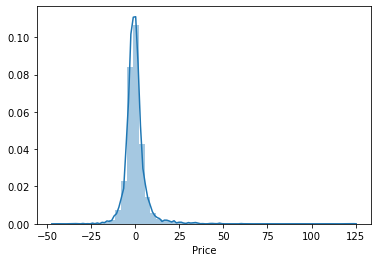

In [138]:
ErrorMetric(new_model,xtrain,ytrain)

(84.9500508446753, 39.11742237999155, <AxesSubplot:xlabel='Price'>)

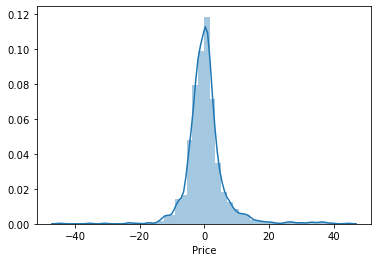

In [139]:
ErrorMetric(new_model,xtest,ytest)

In [140]:
# error from the model seems to be normally distributed

<AxesSubplot:xlabel='Price'>

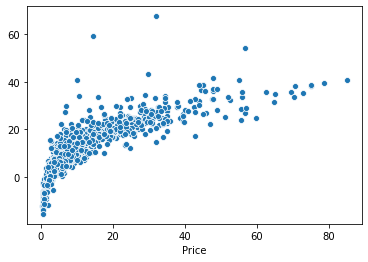

In [141]:
Yhat = new_model.predict(xtest)
Y = ytest
sns.scatterplot(Y,Yhat)

In [142]:
np.corrcoef(Y,Yhat) # a good correlation between actual and predicted using test set

array([[1.        , 0.83164586],
       [0.83164586, 1.        ]])

In [143]:
resultsDF.sort_values(by='p_value',ascending=False)

,Variables,coefficients,p_value
9,Location_Kochi,-0.06,0.44
6,Location_Delhi,-0.12,0.38
12,Location_Pune,0.21,0.31
14,FuelType_LPG,1.50,0.29
8,Location_Jaipur,0.65,0.08
11,Location_Mumbai,-0.60,0.06
1,Odometer,0.00,0.04
17,OwnerType_Fourth +ACY- Above,4.70,0.03
18,OwnerType_Second,-0.53,0.02
13,FuelType_Electric,9.02,0.02


In [144]:
y = clean_df['Price']
x = clean_df.drop(['Price','engineCC','FuelType_Diesel','mileage','Location_Kochi'],axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1234)

xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

new_model = LinearRegression()

new_model.fit(xtrain,ytrain)

print(new_model.score(xtrain,ytrain))

print(new_model.score(xtest,ytest))

0.7000706125623979
0.6903132829996341


In [145]:
resultsDF = pd.DataFrame()
resultsDF['Variables'] = pd.Series(xtrain.columns)
resultsDF['coefficients'] = pd.Series(np.round(new_model.coef_,2))
resultsDF['p_value'] = pd.Series(np.round(ReturnPValue(new_model,xtrain,ytrain),2))
resultsDF.sort_values(by='p_value',ascending=False)

,Variables,coefficients,p_value
6,Location_Delhi,-0.08,0.41
13,FuelType_LPG,1.50,0.29
11,Location_Pune,0.26,0.23
8,Location_Jaipur,0.70,0.04
1,Odometer,0.00,0.04
10,Location_Mumbai,-0.55,0.04
16,OwnerType_Fourth +ACY- Above,4.70,0.03
12,FuelType_Electric,9.02,0.02
17,OwnerType_Second,-0.53,0.02
18,OwnerType_Third,1.66,0.01


In [146]:
y = clean_df['Price']
x = clean_df.drop(['Price','engineCC','FuelType_Diesel','mileage','Location_Kochi','Location_Delhi'],axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1234)

xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

new_model = LinearRegression()

new_model.fit(xtrain,ytrain)

print(new_model.score(xtrain,ytrain))

print(new_model.score(xtest,ytest))

0.7000680439037767
0.6902474066716742


In [147]:
resultsDF = pd.DataFrame()
resultsDF['Variables'] = pd.Series(xtrain.columns)
resultsDF['coefficients'] = pd.Series(np.round(new_model.coef_,2))
resultsDF['p_value'] = pd.Series(np.round(ReturnPValue(new_model,xtrain,ytrain),2))
resultsDF.sort_values(by='p_value',ascending=False)

,Variables,coefficients,p_value
12,FuelType_LPG,1.50,0.29
10,Location_Pune,0.29,0.20
9,Location_Mumbai,-0.52,0.04
1,Odometer,0.00,0.04
15,OwnerType_Fourth +ACY- Above,4.70,0.03
7,Location_Jaipur,0.73,0.03
16,OwnerType_Second,-0.53,0.02
11,FuelType_Electric,9.02,0.02
17,OwnerType_Third,1.66,0.01
8,Location_Kolkata,-0.89,0.00


In [148]:
y = clean_df['Price']
x = clean_df.drop(['Price','engineCC','FuelType_Diesel','mileage','Location_Kochi','Location_Delhi',
                  'FuelType_LPG'],axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1234)

xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

new_model = LinearRegression()

new_model.fit(xtrain,ytrain)

print(new_model.score(xtrain,ytrain))

print(new_model.score(xtest,ytest))

0.7000482628071347
0.6900697617882772


In [149]:
resultsDF = pd.DataFrame()
resultsDF['Variables'] = pd.Series(xtrain.columns)
resultsDF['coefficients'] = pd.Series(np.round(new_model.coef_,2))
resultsDF['p_value'] = pd.Series(np.round(ReturnPValue(new_model,xtrain,ytrain),2))
resultsDF.sort_values(by='p_value',ascending=False)

,Variables,coefficients,p_value
10,Location_Pune,0.29,0.20
1,Odometer,0.00,0.04
9,Location_Mumbai,-0.52,0.04
14,OwnerType_Fourth +ACY- Above,4.70,0.03
7,Location_Jaipur,0.74,0.03
15,OwnerType_Second,-0.53,0.02
11,FuelType_Electric,9.02,0.02
16,OwnerType_Third,1.66,0.01
13,Transmission_Manual,-2.68,0.00
12,FuelType_Petrol,-1.31,0.00


In [150]:
y = clean_df['Price']
x = clean_df.drop(['Price','engineCC','FuelType_Diesel','mileage','Location_Kochi','Location_Delhi',
                  'FuelType_LPG','Location_Pune'],axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1234)

xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

new_model = LinearRegression()

new_model.fit(xtrain,ytrain)

print(new_model.score(xtrain,ytrain))

print(new_model.score(xtest,ytest))

0.70000423172522
0.6898005338656239


In [151]:
resultsDF = pd.DataFrame()
resultsDF['Variables'] = pd.Series(xtrain.columns)
resultsDF['coefficients'] = pd.Series(np.round(new_model.coef_,2))
resultsDF['p_value'] = pd.Series(np.round(ReturnPValue(new_model,xtrain,ytrain),2))
resultsDF.sort_values(by='p_value',ascending=False)

,Variables,coefficients,p_value
7,Location_Jaipur,0.65,0.05
1,Odometer,0.00,0.04
13,OwnerType_Fourth +ACY- Above,4.71,0.03
14,OwnerType_Second,-0.52,0.03
9,Location_Mumbai,-0.61,0.02
10,FuelType_Electric,9.02,0.02
15,OwnerType_Third,1.70,0.01
0,Age,-0.92,0.00
2,powerBhp,0.14,0.00
3,Location_Bangalore,1.95,0.00


In [152]:
y = clean_df['Price']
x = clean_df.drop(['Price','engineCC','FuelType_Diesel','mileage','Location_Kochi','Location_Delhi',
                  'FuelType_LPG','Location_Pune','OwnerType_Fourth +ACY- Above'],axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1234)

xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

new_model = LinearRegression()

new_model.fit(xtrain,ytrain)

print(new_model.score(xtrain,ytrain))

print(new_model.score(xtest,ytest))

0.699771002502553
0.6906731401107624


In [153]:
resultsDF = pd.DataFrame()
resultsDF['Variables'] = pd.Series(xtrain.columns)
resultsDF['coefficients'] = pd.Series(np.round(new_model.coef_,3))
resultsDF['p_value'] = pd.Series(np.round(ReturnPValue(new_model,xtrain,ytrain),3))
resultsDF.sort_values(by='p_value',ascending=False)

,Variables,coefficients,p_value
7,Location_Jaipur,0.652,0.044
1,Odometer,0.000,0.036
9,Location_Mumbai,-0.594,0.020
13,OwnerType_Second,-0.540,0.020
10,FuelType_Electric,8.994,0.019
14,OwnerType_Third,1.657,0.011
8,Location_Kolkata,-0.989,0.002
4,Location_Chennai,1.037,0.001
0,Age,-0.917,0.000
2,powerBhp,0.141,0.000


In [154]:
y = clean_df['Price']
x = clean_df.drop(['Price','engineCC','FuelType_Diesel','mileage','Location_Kochi','Location_Delhi',
                  'FuelType_LPG','Location_Pune','OwnerType_Fourth +ACY- Above','Odometer'],axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1234)

xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

new_model = LinearRegression()

new_model.fit(xtrain,ytrain)

print(new_model.score(xtrain,ytrain))

print(new_model.score(xtest,ytest))

0.6996154616418608
0.6912643086728383


In [155]:
resultsDF = pd.DataFrame()
resultsDF['Variables'] = pd.Series(xtrain.columns)
resultsDF['coefficients'] = pd.Series(np.round(new_model.coef_,3))
resultsDF['p_value'] = pd.Series(np.round(ReturnPValue(new_model,xtrain,ytrain),3))
resultsDF.sort_values(by='p_value',ascending=False)

,Variables,coefficients,p_value
6,Location_Jaipur,0.663,0.042
9,FuelType_Electric,8.972,0.020
12,OwnerType_Second,-0.540,0.020
8,Location_Mumbai,-0.610,0.017
13,OwnerType_Third,1.654,0.011
3,Location_Chennai,1.073,0.001
7,Location_Kolkata,-1.010,0.001
0,Age,-0.911,0.000
1,powerBhp,0.141,0.000
2,Location_Bangalore,1.963,0.000


In [156]:
# Null: beta estimates are = 0
# Alt : beta estimates are != 0

In [157]:
resultsDF.sort_values(by='coefficients',ascending=False)

,Variables,coefficients,p_value
9,FuelType_Electric,8.972,0.020
4,Location_Coimbatore,2.348,0.000
2,Location_Bangalore,1.963,0.000
5,Location_Hyderabad,1.915,0.000
13,OwnerType_Third,1.654,0.011
3,Location_Chennai,1.073,0.001
6,Location_Jaipur,0.663,0.042
1,powerBhp,0.141,0.000
12,OwnerType_Second,-0.540,0.020
8,Location_Mumbai,-0.610,0.017


In [158]:
# The Above table has the best result so far, we can explore additional modeling options and see how much 
# improvement we are getting

In [159]:
print(np.round(new_model.score(xtrain,ytrain),2))

print(np.round(new_model.score(xtest,ytest),2))

0.7
0.69


In [160]:
# Since the difference between training score and test score is within +/- 2%, the model is acceptable
# there is no sign of overfitting here
# all the assumptions are also met
# the correlation between actual and predicted on the test is close to 82%
# hence this is the final model